In [136]:
import pandas as pd
import os 
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")
files = [file for file in os.listdir('./Sales_Data')]
all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data,df])
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [137]:
all_months_data.to_csv("DF.csv", index =False)

In [138]:
df=pd.read_csv("DF.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [139]:
#What was the best month for sales and how much was earned for it?.

In [140]:
#1)first lets augment the data with some additional columns

In [141]:
df['month'] = df['Order Date'].str[0:2]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04


In [142]:
#clean up the data by removing NaN values

In [143]:
#filter NaN rows
NaN_df = df[df.isna().any(axis=1)]
NaN_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
#now we can drop NaN 
df  = df.dropna(how ='all')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [145]:
#Filter 'or' error
or_df = df[df['Order Date'].str[0:2] == 'Or']
or_df 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [146]:
#Remove 'Or error'
df = df[df['Order Date'].str[0:2] != 'Or']
df 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [147]:
#Lets convert columns to the correct data type 
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])#make it int
df['Price Each'] = pd.to_numeric(df['Price Each'])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [148]:
#now lets querry our data...What was the best month for sales and how much was earned for it?.

In [149]:
#Sales = quantity ordered x price. therefore we will create another column for Sales


In [150]:
df['Sales'] = df['Price Each']*df['Quantity Ordered']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99


In [151]:
#to get the best month for sales, we do the groupby method


In [152]:
results = df.groupby('month').sum()


In [153]:
results.head()

,Quantity Ordered,Price Each,Sales
month,,,
01,10903,1811768.38,1822256.73
02,13449,2188884.72,2202022.42
03,17005,2791207.83,2807100.38
04,20558,3367671.02,3390670.24
05,18667,3135125.13,3152606.75


In [154]:
#it is obvious december was the best month for sales with 4613443.34 in sales

In [155]:
#now lets plot a bar chart for this

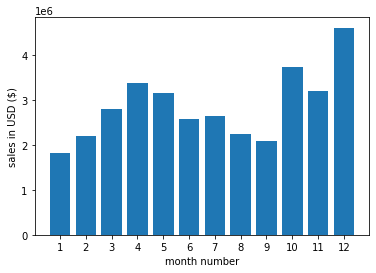

In [156]:
import matplotlib.pyplot as plt
month = range(1,13)
plt.bar(month, results['Sales'])
plt.xticks(month)
plt.ylabel('sales in USD ($)')
plt.xlabel('month number')
plt.show()

In [157]:
#which city had the most sales? 
#to do this we have to augment our data with with a city column using the .apply method

In [158]:

df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles


In [159]:
#another cool way to do this is to create a function and grab the column we want.
#e.g
def get_city(address):
    return address.split(',')[1]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles


In [160]:
df['City'] = df['Purchase Address'].apply(lambda x: get_city(x)+'(' +get_state(x) +')')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas(TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston(MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles(CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles(CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles(CA)


In [163]:
results = df.groupby('City').sum()
results

,Quantity Ordered,Price Each,Sales
City,,,
Atlanta(GA),16602,2779908.20,2795498.58
Austin(TX),11153,1809873.61,1819581.75
Boston(MA),22528,3637409.77,3661642.01
Dallas(TX),16730,2752627.82,2767975.40
Los Angeles(CA),33289,5421435.23,5452570.80
New York City(NY),27932,4635370.83,4664317.43
Portland(ME),2750,447189.25,449758.27
Portland(OR),11303,1860558.22,1870732.34
San Francisco(CA),50239,8211461.74,8262203.91


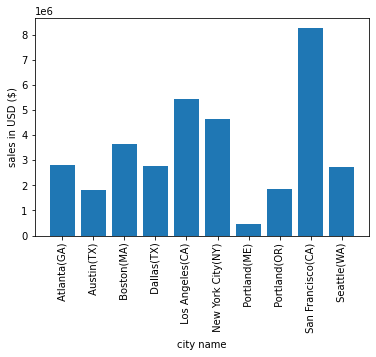

In [164]:
import matplotlib.pyplot as plt
City = [City for City, df in df.groupby('City')]
plt.bar(City, results['Sales'])
plt.xticks(City, rotation = 'vertical', size = 10)
plt.ylabel('sales in USD ($)')
plt.xlabel('city name')
plt.show()

In [165]:
#what time of the day should we display advertisements in order to maximise likelihood of customers buying the product?

In [166]:
#first we need to convert the Date column into the correct data type then split it into  date and time coulumns
df ['Order Date'] = pd.to_datetime(df['Order Date'])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas(TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston(MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles(CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles(CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles(CA)


In [167]:
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas(TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston(MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles(CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles(CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles(CA),9,27


In [168]:
 df.groupby(['Hour']).count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Minute
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


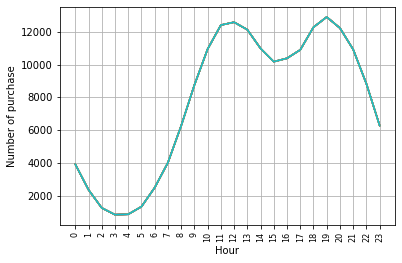

In [169]:
hours = [hour for hour, df in df.groupby('Hour')]
plt.plot(hours, df.groupby(['Hour']).count())
plt.xticks(hours, rotation='vertical', size =8)
plt.xlabel('Hour')
plt.ylabel('Number of purchase')
plt.grid()
plt.show()

In [170]:
#What products are often sold together?

In [173]:
result = df[df['Order ID'].duplicated(keep=False)]
result.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hour,Minute
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles(CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles(CA),14,38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,600.00,Los Angeles(CA),19,42
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,11.95,Los Angeles(CA),19,42
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",04,99.99,Boston(MA),11,31


In [174]:
result['Grouped'] = result.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
result.head(20)


C:\Users\vreng\AppData\Local\Temp/ipykernel_13956/3535546408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Grouped'] = result.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hour,Minute,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles(CA),14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles(CA),14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,600.00,Los Angeles(CA),19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,11.95,Los Angeles(CA),19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",04,99.99,Boston(MA),11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",04,99.99,Boston(MA),11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",04,5.98,San Francisco(CA),17,0,"AAA Batteries (4-pack),Google Phone"
33,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",04,600.00,San Francisco(CA),17,0,"AAA Batteries (4-pack),Google Phone"
119,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",04,14.95,New York City(NY),11,7,"Lightning Charging Cable,USB-C Charging Cable"
120,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",04,11.95,New York City(NY),11,7,"Lightning Charging Cable,USB-C Charging Cable"


In [176]:
#Getting rid of duplicates

result = result[['Order ID', 'Grouped']].drop_duplicates()
result.head(10)

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


In [177]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in result['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
count.most_common(10)
    
    

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [ ]:
#Which product sold the most

In [193]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas(TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston(MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles(CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles(CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles(CA),9,27


In [205]:
product_group=df.groupby('Product')
product_group.sum()


,Quantity Ordered,Price Each,Sales,Hour,Minute
Product,,,,,
20in Monitor,4129,451068.99,454148.71,58764,122252
27in 4K Gaming Monitor,6244,2429637.70,2435097.56,90916,184331
27in FHD Monitor,7550,1125974.93,1132424.50,107540,219948
34in Ultrawide Monitor,6199,2348718.19,2355558.01,89076,183480
AA Batteries (4-pack),27635,79015.68,106118.40,298342,609039
AAA Batteries (4-pack),31017,61716.59,92740.83,297332,612113
Apple Airpods Headphones,15661,2332350.00,2349150.00,223304,455570
Bose SoundSport Headphones,13457,1332366.75,1345565.43,192445,392603
Flatscreen TV,4819,1440000.00,1445700.00,68815,142789


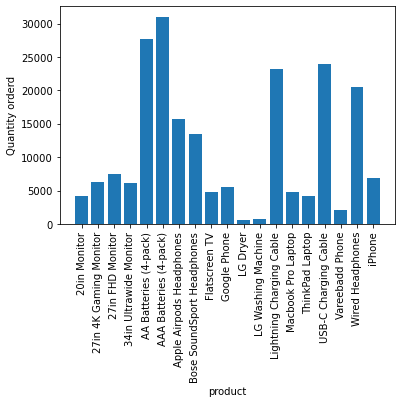

In [236]:
Quantity_ordered=product_group.sum()['Quantity Ordered']
products = [product for product, df in product_group]
plt.bar(products,Quantity_ordered)
plt.xticks(products, rotation = 'vertical', size = 10)
plt.ylabel('Quantity orderd')
plt.xlabel('product')
plt.show()



In [237]:
prices = df.groupby('Product').mean()['Price Each']
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


C:\Users\vreng\AppData\Local\Temp/ipykernel_13956/3038980419.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=10)


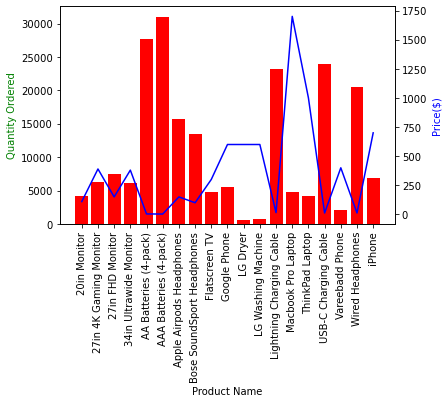

In [251]:
prices = df.groupby('Product').mean()['Price Each']
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, Quantity_ordered, color='r')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=10)
plt.show()